<a href="https://colab.research.google.com/github/mnassar/py2vpy3xai/blob/main/py2vpy3XaiShap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

@author: mnassar

Code for experimenting with the Shap explainer

In [ ]:
!pip install shap

In [ ]:
from keras import models
# model_str = 'MM_dataset10k_Win5_NF32.keras'
# model_str = 'MM_dataset10k_Win5_NF64.keras'
# model_str = 'MM_dataset10k_Win5_NF128.keras'
# model_str = 'MM_dataset10k_Win7_NF32.keras'
# model_str = 'MM_dataset10k_Win7_NF64.keras'
# model_str = 'MM_dataset10k_Win7_NF128.keras'
# model_str = 'MM_dataset10k_Win10_NF32.keras'
# model_str = 'MM_dataset10k_Win10_NF64.keras'
model_str = 'MM_dataset10k_Win10_NF128.keras'
m = models.load_model(model_str)
MAX_LEN = 100
WIN_SIZE = int (model_str.split("_")[2][3:])
EXPL_WIN = WIN_SIZE + 3
EXPL_EVAL_THR = 3
dataset = model_str.split("_")[1]+".csv"
m.summary()

Model: "MM_dataset10k_Win10_NF128"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_17 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 embedding_16 (Embedding)    (None, 100, 8)               2048      ['input_17[0][0]']            
                                                                                                  
 conv1d_33 (Conv1D)          (None, 100, 128)             10368     ['embedding_16[0][0]']        
                                                                                                  
 conv1d_32 (Conv1D)          (None, 100, 128)             10368     ['embedding_16[0][0]']        
                                                                          

In [ ]:
print(WIN_SIZE)
print(dataset)

10
dataset10k.csv


In [ ]:
import shap
import re

In [ ]:
from keras.utils import pad_sequences

# sample to explain
line = "from __future__ import print_function"
def predict (lines):
  samples = [  bytearray(line, encoding="utf-8") for line in lines ]
  samples_padded = pad_sequences(samples, maxlen=MAX_LEN, padding='post', truncating='post')
  preds = m.predict(samples_padded)
  # if pred < 0.5:
  #   label="python2"
  # else:
  #   label="python3"
  return preds

predict(["", line])

1/1 [==============================] - 0s 146ms/step


array([[0.9761844 ],
       [0.00118007]], dtype=float32)

In [ ]:
explainer = shap.Explainer(predict,
                           masker=shap.maskers.Text(
                               shap.maskers._text.SimpleTokenizer(split_pattern=r"\s+")
                           ),
                           mask_token=" "*WIN_SIZE, output_names=["py3/2"])

In [ ]:
# Explain for dataset
import pandas as pd
# prepare data once for all
df = pd.read_csv(dataset, dtype={
    '__future__': 'object',
    'xrange': 'object'})
df = df.drop ( df[df["lines of code"].isnull()].index )
# df

In [ ]:
# consider only lines with annotated explanations
df_expl = df[df["explanation"].notnull()]
# add predictions
df_expl = df_expl.join( pd.Series(name="pred", data = predict(df_expl["lines of code"]).reshape(-1), index=df_expl.index) )
# consider only correct predictions
df_expl["pred_class"] = df_expl["pred"].map(lambda x: 3 if x>0.5 else 2)
df_expl = df_expl.loc[df_expl["pred_class"] == df_expl["class"]]
df_expl.shape


59/59 [==============================] - 0s 8ms/step


(1864, 14)

In [ ]:
df_expl['lines of code']

41      console.print(f"[i] {len(fingerprints) or 'No'...
498     console.print(prefix2, (value, True), prefix =...
586     console.print(f" -  {host['ip']} [{', '.join(h...
630                                     console.print(l1)
942     console.print(l1.ljust(24), (value, True), pre...
                              ...                        
9785    print(f" -  Extended Unique Identifier 64:    ...
9791    console.print(f" -  {e}", color = "red", dark ...
9804       print("    - " + id.split("/")[-1], dark=True)
9806    print('NOTE: Clearance = Loosest fit & Allowan...
9818    print("Clearance = {0} in".format(str(round(cl...
Name: lines of code, Length: 1864, dtype: object

In [ ]:
def explain(line):
   print(line)
   if len ( re.split("\s+", line) ) == 1:
    return line
   shap_values = explainer([line])
   idx = shap_values.values.argmax()
   print(shap_values.data[0][idx])
   return shap_values.data[0][idx]
df_small = df_expl.copy()

In [ ]:
%%time
# df_small = df_expl.iloc[:10].copy()
df_small['shap'] = df_small['lines of code'].map(explain)

console.print(f"[i] {len(fingerprints) or 'No'} fingerprints {f'and {len(hosts)}' if fingerprints else 'or'} hosts were found.")
1/1 [==============================] - 0s 97ms/step


  0%|          | 0/182 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:12, 12.10s/it]               

fingerprints 
console.print(prefix2, (value, True), prefix = prefix2)
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 35ms/step
= 
console.print(f" -  {host['ip']} [{', '.join(host.get('443.https.tls.certificate.parsed.names', host.get('443.https.tls.certificate.parsed.extensions.subject_alt_name.dns_names', [])))}]", dark = True)
1/1 [==============================] - 0s 21ms/step
-  
console.print(l1)
console.print(l1.ljust(24), (value, True), prefix = prefix2)
1/1 [==============================] - 0s 21ms/step
(value, 
console.print(f"[+] {fingerprint}: {', '.join(common_name or names or [])}")
1/1 [==============================] - 0s 20ms/step
console.print(f"[+] 
console.print(f"{prefix}|--{key}: ({programs}/{folders})")
1/1 [==============================] - 0s 20ms/step
({programs}/{folders})")
console.print(f"[i] There are {total[0] or 'no'} programs available {f'on {total[1]} folders' if total[1] else ''}!")
1/1 [==============================] - 0s 21ms/step
{f'on 
console.print(f" -  {sdn}")
1/1 [==============================] - 0s 22ms/step
-  


  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step
possibility 
os.link(path_dem,u'dem.grd')
u'<2i',
[self._port][u'used_by'] = None
1/1 [==============================] - 0s 23ms/step
= 
self.ecn = u"Non-ECT" if self.raw_ecn is 0 else (u"ECT(0)" if self.raw_ecn is 2 else (u"ECT(1)" if self.raw_ecn is 1 else u"CE"))
1/1 [==============================] - 0s 24ms/step
self.ecn 
@_(u'params COMMA param')
1/1 [==============================] - 0s 27ms/step
COMMA 
0x21: u"DCCP",      0x22: u"3PC",         0x23: u"IDPR",
1/1 [==============================] - 0s 21ms/step
0x22: 
if hole_lmc == u"?" and shaft_lmc != u"?" and clearance !=u"?":
1/1 [==============================] - 0s 36ms/step
and 
u'double':ir.DoubleType(),
(u"raw_identification", c_ushort),
1/1 [==============================] - 0s 37ms/step
c_ushort),
assert isinstance(value, int), u"polarity_right needs to be of type int"
1/1 [==============================] - 0s 23ms/step
type 
elif branch[0] == u'If':
1/1 [===========

  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step
will 
u'<2i2B',
else: lang =  u'en'
1/1 [==============================] - 0s 23ms/step
lang 
@_(u'NAME EQ expr')
1/1 [==============================] - 0s 22ms/step
EQ 
(u"raw_total_length", c_ushort),
1/1 [==============================] - 0s 24ms/step
c_ushort),
person = self.parser.add_argument_group(u"Person API")
1/1 [==============================] - 0s 30ms/step
API")
raise ValueError(u"Invalid port: %s" % port)
1/1 [==============================] - 0s 34ms/step
port)
u'os_version',
port_str = u'PORT_C'
1/1 [==============================] - 0s 32ms/step
port_str 
filename1=u'sensor_output.csv'
u"Module": u"@blackviruscript"}
1/1 [==============================] - 0s 33ms/step
u"@blackviruscript"}
name = self.parser.add_argument_group(u"Name Lookup")
1/1 [==============================] - 0s 21ms/step
name 
u"speed must be an int"
1/1 [==============================] - 0s 22ms/step
int"
g.write(u'preproc_batch_tops.csh data.i

  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step
help 
u'name',
with open(path + u'.rsf', u'rb') as file:
1/1 [==============================] - 0s 21ms/step
file:
u'<2i',
address = address if address else int(memory_map[0][u'address'], 0)
1/1 [==============================] - 0s 22ms/step
address 
until_loop_otherwise = self.builder.append_basic_block(u"until_loop_otherwise"+unicode(self.i))
1/1 [==============================] - 0s 20ms/step
= 
assert isinstance(value, int), u'value must be an integer'
1/1 [==============================] - 0s 20ms/step
isinstance(value, 
@_(u'expr PLUS expr',
1/1 [==============================] - 0s 21ms/step
expr',
tmp=info[0]+u':'+EOF_list[i]
RGBColor = namedtuple(u'RGBColor', [
1/1 [==============================] - 0s 20ms/step
RGBColor 
actions.add_argument(u"-t", u"--twitter", type = unicode, metavar = u"username", help = u"Request information about a specific person by twitter.")
1/1 [==============================] - 0s 35ms/step
= 
eli

  0%|          | 0/380 [00:00<?, ?it/s]

non-blocking 
if allowance != u"?":
1/1 [==============================] - 0s 22ms/step
if 
if not fullname.endswith(u".py"):
1/1 [==============================] - 0s 22ms/step
if 
if name == u'printf':
1/1 [==============================] - 0s 20ms/step
if 
upbeat_duration = 60 * song[u"upbeat"] / song[u"tempo"]
1/1 [==============================] - 0s 26ms/step
60 
parent_path = path.rsplit(u"/", 1)[0] + u"/"
1/1 [==============================] - 0s 21ms/step
parent_path 
target_pos_inner = cur_mov[u'target_motor_pos'][1]
1/1 [==============================] - 0s 21ms/step
target_pos_inner 
u':'.join(u'{:02X}'.format(byte) for byte in cmd[5:7]) + u'|' +
1/1 [==============================] - 0s 22ms/step
cmd[5:7]) 
value = self.builder.icmp_signed(u'<=',lhs,rhs)
1/1 [==============================] - 0s 21ms/step
value 
groupStyleCol = u'''
1/1 [==============================] - 0s 25ms/step
groupStyleCol 
Network = namedtuple(u'Network', [
1/1 [==============================] - 0

  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step
help 
from __future__ import with_statement
1/1 [==============================] - 0s 23ms/step
with_statement
0x7C: u"IS-IS",     0x7D: u"FIRE",        0x7E: u"CRTP",
1/1 [==============================] - 0s 24ms/step
0x7C: 
print u'Yes clicked.'
1/1 [==============================] - 0s 24ms/step
clicked.'
pcap = raw_input(u"Enter the name of your pcap file in this folder: ")
1/1 [==============================] - 0s 28ms/step
this 
print u'Error Serial2'
1/1 [==============================] - 0s 26ms/step
Serial2'
raise EnvironmentError(u'Unsupported platform')
1/1 [==============================] - 0s 24ms/step
raise 
print u"Shaft MMC = {0} in".format(unicode(round(shaft_mmc,4)))
1/1 [==============================] - 0s 32ms/step
MMC 
u'blue'
u'concurrent movement in progress'
1/1 [==============================] - 0s 30ms/step
movement 
u'expr RSHIFT expr',
1/1 [==============================] - 0s 32ms/step
expr',
u'xx:xx:xx.

  0%|          | 0/420 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step
sort 
self._introspection[u"network_mac_adr"][i:i+2]
assert response[u"status"] == u"success", Exception(f"{' - '.join(f'{key.title()}: {value}' for key, value in response.items())}")
1/1 [==============================] - 0s 22ms/step
value 
resolver.use_edns(arguments.get(u"edns"), arguments.get(u"edns_flags"), arguments.get(u"edns_payload"))
1/1 [==============================] - 0s 22ms/step
resolver.use_edns(arguments.get(u"edns"), 
self.parser.add_argument(u"-eP", u"--edns-payload", type=int, default=0, help=u"The EDNS payload size (Defaults to 0).")
1/1 [==============================] - 0s 21ms/step
(Defaults 
+ u' tmp_file ../raw_orig/s1a-aux-cal.xml > ./'
1/1 [==============================] - 0s 22ms/step
> 
[port_motor_input(self._port_left)][u'used_by'] is not None:
1/1 [==============================] - 0s 21ms/step
not 
print u'The llvm IR generated is:'
1/1 [==============================] - 0s 28ms/step
is:'
assert u'

  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step
connections 
for i in xrange(8):
1/1 [==============================] - 0s 25ms/step
for 
self.parser.add_argument(u"-d", u"--debug", action = u"store_true", help = u"Debug program listing (-l/--list must be specified).")
1/1 [==============================] - 0s 22ms/step
(-l/--list 
print line
1/1 [==============================] - 0s 22ms/step
line
if country: url += u"&country=" + country
1/1 [==============================] - 0s 22ms/step
country: 
label.config(fg=u'#000000')
for i in xrange (len(del_index)):
1/1 [==============================] - 0s 23ms/step
for 
g=open(u'batch_tops.config', u'w')
1/1 [==============================] - 0s 23ms/step
u'w')
os.chdir(u'..')
for i in xrange (len(image_list)):
1/1 [==============================] - 0s 25ms/step
for 
u"port_right needs to be an integer"
1/1 [==============================] - 0s 22ms/step
integer"
with open(request.param, u'rb') as fw:
1/1 [============================

  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step
code 
self.conButton.setText(u'Measure')
print u'ENTER ANY TWO KNOWNS (HOLE/SHAFT/FIT)'
1/1 [==============================] - 0s 27ms/step
(HOLE/SHAFT/FIT)'
int(sector[u'address'], 0) + int(sector[u'size'], 0))
1/1 [==============================] - 0s 22ms/step
+ 
(u"d''", .25),
1/1 [==============================] - 0s 21ms/step
.25),
u"volume needs to be in range [0 - 100]"
1/1 [==============================] - 0s 22ms/step
[0 
self._socket.send(msg.encode(u'utf-8'))
self._physical_ev3._introspection[u"sensors"] \
1/1 [==============================] - 0s 22ms/step
\
if self.conButton.text() == u'Measure' and port_serial != u'':
1/1 [==============================] - 0s 31ms/step
!= 
u'''
size = (int(memory_map[-1][u'address'], 0) +
1/1 [==============================] - 0s 37ms/step
= 
flags.append(u"Don't Fragment (DF)")
1/1 [==============================] - 0s 37ms/step
(DF)")
serial_number = u':'.join(
1/1 [=================

  0%|          | 0/462 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step
--locality=Dallas.")
speed = cur_mov[u'speed_left']
1/1 [==============================] - 0s 26ms/step
= 
print fits
1/1 [==============================] - 0s 30ms/step
fits
), u'LED pattern ' + led_pattern + u' not provided'
1/1 [==============================] - 0s 27ms/step
not 
u"tread needs to be a number"
1/1 [==============================] - 0s 25ms/step
number"
u"type": socket.SOCK_DGRAM if self.arguments.udp else socket.SOCK_STREAM,
1/1 [==============================] - 0s 29ms/step
else 
step3 = cur_mov[u'step3_left']
1/1 [==============================] - 0s 29ms/step
step3 
value = self.builder.icmp_signed(u'>=',lhs,rhs)
1/1 [==============================] - 0s 23ms/step
value 
self.parser.add_argument(u"domain", type = unicode, help = u"Target domain name.")
1/1 [==============================] - 0s 40ms/step
domain 
u':'.join(u'{:02X}'.format(byte) for byte in reply[4:5]) +
1/1 [==============================] - 0s 4

  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step
relevance: 
self.address = (address + u".onion" if len(address) == 16 else address).lower()
1/1 [==============================] - 0s 22ms/step
(address 
MotorPositions = namedtuple(u'MotorPositions', [
1/1 [==============================] - 0s 21ms/step
MotorPositions 
if value != self._physical_ev3._introspection[u"volume"]:
1/1 [==============================] - 0s 23ms/step
value 
src1 = u'sensor_output.csv'
1/1 [==============================] - 0s 32ms/step
src1 
author, u'ev3_dc', u'One line description of project.',
1/1 [==============================] - 0s 31ms/step
description 
ax1.plot(xar,yar3,label=u'Digital Temperature',linewidth=2)
1/1 [==============================] - 0s 30ms/step
Temperature',linewidth=2)
u'direction must be an int value'
1/1 [==============================] - 0s 24ms/step
value'
cur_mov[u'start_motor_pos'][0]
print f"[i] Request results for Domain Name based Company Lookup:"
1/1 [===================

  0%|          | 0/462 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step
York 
(u"d''", 1),
1/1 [==============================] - 0s 24ms/step
1),
if hole_lmc == u"?" and hole_mmc != u"?":
1/1 [==============================] - 0s 23ms/step
hole_mmc 
elif ct.split(u"/")[0] == u"text" and ct.endswith(u"+xml"):
1/1 [==============================] - 0s 25ms/step
and 
else u'NXT_ULTRASONIC'
1/1 [==============================] - 0s 23ms/step
else 
nameservers = arguments.get(u"nameservers")
1/1 [==============================] - 0s 27ms/step
= 
u'not the expected movement: ' + self._current_movement[u'op']
1/1 [==============================] - 0s 23ms/step
movement: 
u"ramp_up_time must be positive"
1/1 [==============================] - 0s 40ms/step
be 
@_retry(_RETRIES, u'write memory', _serial_flush)
1/1 [==============================] - 0s 36ms/step
@_retry(_RETRIES, 
data=u"null"
self.ast[1][u'body'] = p.statements
1/1 [==============================] - 0s 38ms/step
p.statements
@_(u'LPAREN expr RPARE

  0%|          | 0/420 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step
time.tzname[0]) 
u'ip_adr',
elif branch[0] == u'Def':
1/1 [==============================] - 0s 24ms/step
elif 
u'Erase memory failed: can not find boundaries '
1/1 [==============================] - 0s 24ms/step
can 
struct.pack(u'<H', 1012),      # SIZE
1/1 [==============================] - 0s 26ms/step
# 
label=tk.Label(self, text=u'File name for step 1.')
1/1 [==============================] - 0s 22ms/step
label=tk.Label(self, 
u'led_pattern must be of type bytes'
1/1 [==============================] - 0s 27ms/step
bytes'
assert reply == u'2C:00'
1/1 [==============================] - 0s 25ms/step
assert 
lhs, lhs_type = self.visit_value(branch[1][u'lhs'])
1/1 [==============================] - 0s 22ms/step
= 
value = self.builder.fcmp_ordered(u'==',lhs,rhs)
1/1 [==============================] - 0s 22ms/step
value 
if proxy.port: kwargs[u"port"] = proxy.port
1/1 [==============================] - 0s 33ms/step
proxy.port
rb2.conf

  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 36ms/step
YYYY-MM 
print u'rawclose = ' + rawclose
1/1 [==============================] - 0s 21ms/step
rawclose
resolver.set_flags(arguments.get(u"flags"))
0x1B: u"RDP",       0x1C: u"IRTP",        0x1D: u"ISO-TP4",
1/1 [==============================] - 0s 21ms/step
0x1B: 
self.dtemVal = QLabel(unicode(y3) +  u' °' )
1/1 [==============================] - 0s 21ms/step
self.dtemVal 
u"upbeat": 1,
1/1 [==============================] - 0s 25ms/step
1,
response = api.person(self.arguments.phone, u"phone", countryCode = self.arguments.country_code, **kwargs, **pkwargs)
1/1 [==============================] - 0s 25ms/step
**pkwargs)
print u"\x1B\x5B2J",; sys.stdout.write(u"")
1/1 [==============================] - 0s 23ms/step
print 
u'Protocol ' + protocol + u'is not valid'
1/1 [==============================] - 0s 21ms/step
' 
assert commands, u"Invalid executable Program!"
1/1 [==============================] - 0s 24ms/step
executable 
u'''pytest

  0%|          | 0/342 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step
wait 
u"delta_time must be positive"
1/1 [==============================] - 0s 28ms/step
be 
def _retry(retry_num = 0, action = u'', exc_call = None):
1/1 [==============================] - 0s 26ms/step
0, 
mac_addr = u':'.join((tmp[i:i + 2] for i in xrange(0, len(tmp), 2)))
1/1 [==============================] - 0s 25ms/step
len(tmp), 
binary = [(byte >> bit) & 1 for bit in xrange(7, -1, -1)]
1/1 [==============================] - 0s 25ms/step
[(byte 
u"Can't erase specified size of memory without memory map.")
1/1 [==============================] - 0s 26ms/step
without 
phone = self.parser.add_argument_group(u"Phone Lookup")
1/1 [==============================] - 0s 24ms/step
= 
print answer.response
1/1 [==============================] - 0s 25ms/step
answer.response
@_(u'def_params COMMA def_param')
1/1 [==============================] - 0s 38ms/step
COMMA 
self.iw_tmp=[u'iw1',u'iw2',u'iw3']
u'address': u'Memory address for ',
1/1 

  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step
which 
os.chdir(u'../raw')
u'sB' + unicode(part_size) + u's',
1/1 [==============================] - 0s 22ms/step
+ 
title=u"Select a file")
1/1 [==============================] - 0s 22ms/step
file")
filename=resource_path(os.path.join(u'src', filename1))
1/1 [==============================] - 0s 23ms/step
filename1))
test,Type = self.visit_value(branch[1][u'test'])
1/1 [==============================] - 0s 21ms/step
test,Type 
u"duration needs to be positive"
1/1 [==============================] - 0s 22ms/step
be 
u'run': u'Run program after loading.',
1/1 [==============================] - 0s 25ms/step
after 
rb1=tk.Radiobutton(self, text=u'yes',
1/1 [==============================] - 0s 23ms/step
rb1=tk.Radiobutton(self, 
u'expr LE expr',
1/1 [==============================] - 0s 25ms/step
expr',
u"led_sequence": (
1/1 [==============================] - 0s 61ms/step
(
struct.pack(u'<BH', handle, part_size)  # HANDLE, SIZE
1/1 [====

  0%|          | 0/420 [00:00<?, ?it/s]

1/1 [==============================] - 0s 34ms/step
customize 
tmp=tmp+EOF_check[i]+u'  '
1/1 [==============================] - 0s 25ms/step
'
certificates = [dict((key.rsplit(u".", 1)[-1], value) for key, value in cert.items()) for cert in censys.certificates.search(f"{self.arguments.domain} and tags: trusted", fields = fields) if cert]
1/1 [==============================] - 0s 44ms/step


  0%|          | 0/462 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step
1)[-1], 
u'int':ir.IntType(32),
(u"raw_flags", c_ushort, 3),
1/1 [==============================] - 0s 21ms/step
3),
label.grid(row=6, column=3, columnspan=5, sticky=u'w')
1/1 [==============================] - 0s 21ms/step
column=3, 
''.join([address.to_bytes(4, u'big'),
1/1 [==============================] - 0s 25ms/step
u'big'),
0x24: u"XTP",       0x25: u"DDP",         0x26: u"IDPR-CMTP",
1/1 [==============================] - 0s 22ms/step
0x24: 
if hole_mmc != u"?":
1/1 [==============================] - 0s 22ms/step
if 
answer = resolver.query(arguments.pop(u"query"), **kwargs)
1/1 [==============================] - 0s 32ms/step
**kwargs)
ramp_down_time=self._current_movement[u'ramp_down_time'],
self._device.open_path(dev[u'path'])
arg_parser = argparse.ArgumentParser(description=u'Stm32 uart dfu utility.')
1/1 [==============================] - 0s 29ms/step
uart 
raise RuntimeError(u'unknown op in current movement')
1/1 [======

  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step
Timeout 
u'x',
name.add_argument(u"--country", type = unicode, help = u"If supplied, only companies matching given country will be returned. For example, country=United States or country=US.")
1/1 [==============================] - 0s 24ms/step


  0%|          | 0/462 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step
type 
last_pos_outer = cur_mov[u'last_motor_pos'][1]
1/1 [==============================] - 0s 26ms/step
= 
self.listLabel2 = QLabel(u'')
1/1 [==============================] - 0s 25ms/step
self.listLabel2 
name.decode(u"utf8"),
self._physical_ev3._introspection[u"os_vers"],
u'readout unprotect': 0x92
1/1 [==============================] - 0s 41ms/step
unprotect': 
(u"f#'", 1),
1/1 [==============================] - 0s 40ms/step
1),
value = branch[1][u'value']
1/1 [==============================] - 0s 35ms/step
value 
g.write(u'S1_'+data_date[i]+u'_ALL_F'+iw[-1]
with open(args.file, u'wb') as dump:
1/1 [==============================] - 0s 45ms/step
with 
port=port, baudrate=self._DEFAULT_PARAMETERS[u'baudrate'],
1/1 [==============================] - 0s 26ms/step
port=port, 
struct.pack(u'<H', local_mem * 1024 + global_mem),
1/1 [==============================] - 0s 25ms/step
global_mem),
label.grid(row=4, column=0, columnspan=3, sti

  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step
the 
u"speed needs to be an integer"
1/1 [==============================] - 0s 35ms/step
integer"
dump_command = commands.add_parser(u'dump')
1/1 [==============================] - 0s 37ms/step
dump_command 
cur_mov[u'start_motor_pos'][1]
u'speed  needs to be in range [1 - 100]'
1/1 [==============================] - 0s 25ms/step
[1 
for port in xrange(len(ports)):
1/1 [==============================] - 0s 23ms/step
for 
print f'\r[{"█"*self._complete_len(progress)}'
1/1 [==============================] - 0s 24ms/step
f'\r[{"█"*self._complete_len(progress)}'
(u"g'", 1),
1/1 [==============================] - 0s 23ms/step
1),
self.parser.description = (self.__doc__ or u"No description available.").split(u"\n", 1)[-1].strip()
1/1 [==============================] - 0s 23ms/step
(self.__doc__ 
u'available only for WiFi connected devices'
1/1 [==============================] - 0s 24ms/step
WiFi 
elif branch[0] == u'Float':
1/1 [===========

  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step
format. 
u"bumps needs to be of type int"
1/1 [==============================] - 0s 23ms/step
type 
_fields_ = [(u"ihl", c_ubyte, 4),
1/1 [==============================] - 0s 23ms/step
4),
u'EV3_TOUCH' if self.sensors_as_dict[self._port] == EV3_TOUCH
1/1 [==============================] - 0s 34ms/step
== 
console.print(f"[!] {fullname.replace(self.location, '.')}:", color = u"red")
1/1 [==============================] - 0s 31ms/step
'.')}:", 
(u"d'", 0.25),
1/1 [==============================] - 0s 31ms/step
0.25),
u'ramp_up': ramp_up,
1/1 [==============================] - 0s 36ms/step
ramp_up,
label.grid(row=1, column=0, columnspan=3, sticky=u'w')
1/1 [==============================] - 0s 22ms/step
label.grid(row=1, 
llvm_ir_parsed = llvm.parse_assembly(unicode(module))
1/1 [==============================] - 0s 23ms/step
llvm_ir_parsed 
self.groupBox3 = QGroupBox(u'')
1/1 [==============================] - 0s 24ms/step
self.groupBo

  0%|          | 0/380 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step
str(int(time.timezone/60/60)) 
print('LEAVE UNKNOWNS AS ?')
1/1 [==============================] - 0s 29ms/step
print('LEAVE 
for b in range(0, len(data), 16):
1/1 [==============================] - 0s 22ms/step
range(0, 
print(f'Illegal character {t.value[0]}, in line {self.lineno}, index {self.index}')
1/1 [==============================] - 0s 24ms/step
index 
print(" -  Permanent Key: ")
1/1 [==============================] - 0s 24ms/step
Key: 
print(f"... Received message: type = {type}, ver = {version:04x}, length = {len(payload)}", dark=True)
1/1 [==============================] - 0s 35ms/step
type 
print('rawclose = ' + rawclose)
1/1 [==============================] - 0s 41ms/step
rawclose)
print(rtp.payload)
for i in range(0, 100):
1/1 [==============================] - 0s 34ms/step
range(0, 
console.print(f" -  {e}", color = "red", dark = True)
1/1 [==============================] - 0s 24ms/step
-  
print(f"    - {ns} [{', '.

  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step
".join(f"{char:02x}" 
print(f"    - {introduction_point.identifier}: " + f"{introduction_point.address}:{introduction_point.port}", dark = True)
1/1 [==============================] - 0s 24ms/step
print(f"    
print(f"    - Offset:  {info['offset']}", dark=True)
1/1 [==============================] - 0s 25ms/step
dark=True)
print("Scraping: " + pcap_file)
1/1 [==============================] - 0s 35ms/step
print("Scraping: 
print(s + f"{value}", dark = True)
1/1 [==============================] - 0s 33ms/step
print(s 
print(f"[i] Request results for Phone Number based Person Lookup:")
1/1 [==============================] - 0s 35ms/step
Number 
print(f'It returns {result}')
1/1 [==============================] - 0s 22ms/step
print(f'It 
print(resp)
print("Allowance = {0} in\n".format(str(round(allowance,4))))
1/1 [==============================] - 0s 22ms/step
in\n".format(str(round(allowance,4))))
print('Usage: python3 run.py <filenam

  0%|          | 0/342 [00:00<?, ?it/s]

1/1 [==============================] - 0s 59ms/step
"red", 
for port in range(len(ports)):
1/1 [==============================] - 0s 38ms/step
range(len(ports)):
print("[i] Server processed malformed heartbeat, but did not return any extra data.")
1/1 [==============================] - 0s 23ms/step
print("[i] 
def print(*messages, color: str = "white", dark: bool = False, prefix: str = "", parse: bool = True, **kwargs):
1/1 [==============================] - 0s 23ms/step
color: 
ports = ['COM%s' % (i + 1) for i in range(256)]
1/1 [==============================] - 0s 23ms/step
['COM%s' 
print(datetime.now().strftime("[i] Stopped sniffing %A, %B %d at %H:%M:%S!"))
1/1 [==============================] - 0s 24ms/step
print(datetime.now().strftime("[i] 
print(value.prettyPrint(), dark = True)
1/1 [==============================] - 0s 35ms/step
print(value.prettyPrint(), 
print("Shaft LMC = {0} in".format(str(round(shaft_lmc,4))))
1/1 [==============================] - 0s 34ms/step
in".form

  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step
Service 
print(" -  " + "\n -  ".join(page.ul.stripped_strings), dark=True)
1/1 [==============================] - 0s 22ms/step
print(" 
print('Validating firmware...')
1/1 [==============================] - 0s 22ms/step
print('Validating 
print('Error Serial2')
1/1 [==============================] - 0s 24ms/step
print('Error 
print(f" -  Supported Versions: {', '.join(str(v) for v in service.protocol_versions)}")
1/1 [==============================] - 0s 22ms/step
service.protocol_versions)}")
print("[i] Hidden Service Descriptive Info.:")
1/1 [==============================] - 0s 22ms/step
print("[i] 
print("[i] Received heartbeat response:")
1/1 [==============================] - 0s 21ms/step
print("[i] 
print(" -  Introduction Points:")
1/1 [==============================] - 0s 23ms/step
print(" 
print(f"[i] Request results for Domain Name based Company Lookup:")
1/1 [==============================] - 0s 24ms/step
Company 
print("

  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step
else 
print(f" -  {exception}", color = "red", dark = True)
1/1 [==============================] - 0s 31ms/step
"red", 
print("[i] Sending heartbeat request ...")
1/1 [==============================] - 0s 29ms/step
print("[i] 
print("\x1B\x5BH", end="")
1/1 [==============================] - 0s 26ms/step
print("\x1B\x5BH", 
print("[!] Server closed connection without sending Server Hello.", color = "red")
1/1 [==============================] - 0s 29ms/step
print("[!] 
print("[!] Keyboard Interrupted!", color = "red")
1/1 [==============================] - 0s 30ms/step
print("[!] 
print(f"[!] {type(e).__name__}:", color = "red")
1/1 [==============================] - 0s 27ms/step
"red")
for i in range (len(date_list)):
1/1 [==============================] - 0s 28ms/step
range 
print(f'\r[{"█"*self._BAR_MAX_LEN}] done.')
1/1 [==============================] - 0s 27ms/step
print(f'\r[{"█"*self._BAR_MAX_LEN}] 
for i in range (len(self.pol

In [ ]:
# df_small

In [ ]:
# evaluate explainability
import re
EXPL_EVAL_THR = 3

#longest common subsequence
def lcs(X, Y):
    # find the length of the strings
    m = len(X)
    n = len(Y)
    # declaring the array for storing the dp values
    L = [[None]*(n + 1) for i in range(m + 1)]
    """Following steps build L[m + 1][n + 1] in bottom up fashion
    Note: L[i][j] contains length of LCS of X[0..i-1]
    and Y[0..j-1]"""
    for i in range(m+1):
        for j in range(n+1):
            if i == 0 or j == 0 :
                L[i][j] = 0
            elif X[i-1] == Y[j-1]:
                L[i][j] = L[i-1][j-1]+1
            else:
                L[i][j] = 0
    return max ( max(l) for l in L )

def eval_expl(r, col):
  if re.search(re.compile(r'\bu[\'|\"]\s*\S+'), r[col]):
    return True
  return lcs(r["explanation"], r[col]) >= EXPL_EVAL_THR

In [ ]:

df_small["acc_expl_shap"] = df_small.apply(eval_expl, col="shap", axis=1)
acc = sum(df_small["acc_expl_shap"])
print (f"{acc}/{df_small.shape[0]}")
# sum_acc += acc

647/1864


In [ ]:
f"{acc * 100 / df_small.shape[0]:.2f}"
# f"{sum_acc * 100 / df_expl.shape[0]:.2f}"

'34.71'

In [ ]:
# df_small

,lines of code,class,print(,__future__,xrange,range,"u""",print,unicode(,__next__(,raw_input(,explanation,pred,pred_class,shap,acc_expl_shap
41,"console.print(f""[i] {len(fingerprints) or 'No'...",3,"print(f""[i]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"print(f""[i]",0.985269,3,fingerprints,True
498,"console.print(prefix2, (value, True), prefix =...",3,"print(prefix2,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"print(prefix2,",0.998830,3,=,False
586,"console.print(f"" - {host['ip']} [{', '.join(h...",3,"print(f""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"print(f""",1.000000,3,-,False
630,console.print(l1),3,print(l1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,print(l1),0.998774,3,console.print(l1),True
942,"console.print(l1.ljust(24), (value, True), pre...",3,"print(l1.ljust(24),",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"print(l1.ljust(24),",0.999341,3,"(value,",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,"print(f"" - Extended Unique Identifier 64: ...",3,"print(f""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"print(f""",1.000000,3,Unique,False
9791,"console.print(f"" - {e}"", color = ""red"", dark ...",3,"print(f""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"print(f""",0.999992,3,-,False
9804,"print("" - "" + id.split(""/"")[-1], dark=True)",3,"print(""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"print(""",1.000000,3,"print(""",True
9806,print('NOTE: Clearance = Loosest fit & Allowan...,3,print('NOTE:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,print('NOTE:,1.000000,3,print('NOTE:,True


In [ ]:
# df_small

Custom tokenizer / Masker

In [ ]:
# use custome masker

# def custom_tokenizer(loc, return_offsets_mapping=True):
#   out = {}
#   pos = 0
#   offset_ranges = []
#   input_ids = []
#   for pos in range(len(loc)):
#     input_ids.append (loc[pos:pos+WIN_SIZE])
#     offset_ranges.append((pos, pos+WIN_SIZE))
#   out["input_ids"] = input_ids
#   if return_offsets_mapping:
#     out["offset_mapping"] = offset_ranges
#   return out

# loc = "from __future__ import print_function"
# t = custom_tokenizer(loc)
# t
# custom_masker = shap.maskers.Text(custom_tokenizer)
# explainer = shap.Explainer(predict, masker=custom_masker,  output_names=["py3/2"])

In [ ]:
# explore some errors
for col in ['print(', '__future__', 'xrange', ' range',
       'u"', 'print ', 'unicode(', '__next__(', 'raw_input(']:
  den = df_small [ df_small[col].notnull()].shape[0]
  num = df_small [ df_small[col].notnull()].loc [ df_small["acc_expl_shap"] == True ].shape[0]
  print (col, den, num)

print( 206 122
__future__ 3 0
xrange 30 2
 range 32 26
u" 1570 469
print  77 67
unicode( 39 12
__next__( 0 0
raw_input( 6 1


Example single explanation

In [ ]:
line = "from __future__ import print_function"
line = 'print u"hello"'
shap_values = explainer([line])

1/1 [==============================] - 0s 39ms/step


In [ ]:
shap.plots.text(shap_values)

In [ ]:
shap_values

.values =
array([[[-0.4953912 ],
        [-0.49745326]]])

.base_values =
array([[0.99284446]])

.data =
(array(['print ', 'u"hello"'], dtype=object),)

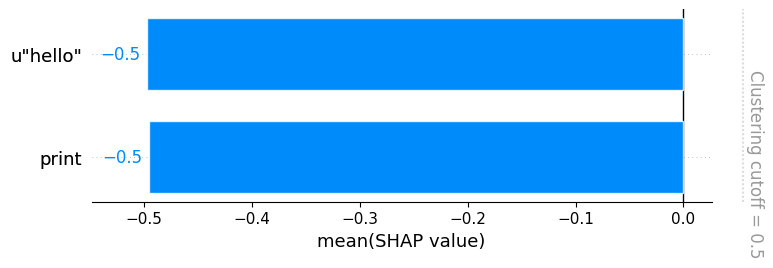

In [ ]:
# not workin maybe cause we have a single class
shap.plots.bar(shap_values[:,:,0].mean(0))